In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\Milind\\Downloads\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_dir = data_dir + "\\test\\"
train_dir = data_dir + "\\train\\"

In [8]:
os.listdir(test_dir)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_dir + 'parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [13]:
para_cell = train_dir + 'parasitized\\'+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png' 

In [14]:
para_cell

'C:\\Users\\Milind\\Downloads\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

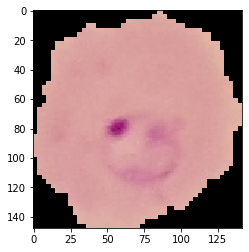

In [17]:
plt.imshow(imread(para_cell))

In [19]:
#len(os.listdir(train_dir + "parasitized"))

12480

In [20]:
#len(os.listdir(train_dir + "uninfected"))

12480

In [21]:
#len(os.listdir(test_dir + "parasitized"))

1300

In [23]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_dir + "uninfected"):
    img = imread(test_dir + "uninfected\\" + image_name)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

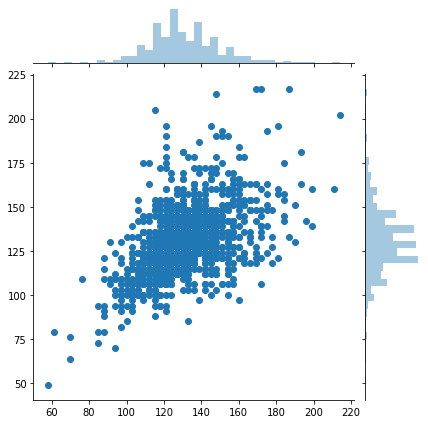

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1)

130.92538461538462

In [27]:
np.mean(dim2)

130.75

In [28]:
# To take mean and resize the images to same dimensions

In [30]:
image_shape = (130,130,3)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
#help(ImageDataGenerator)

In [37]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1
                              ,shear_range = 0.1,
                              zoom_range= 0.1,
                              horizontal_flip=True,
                              fill_mode= 'nearest')

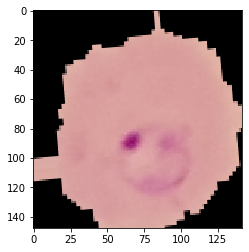

In [41]:
#transforming of images.
para_img = imread(para_cell)

plt.imshow(image_gen.random_transform(para_img))

In [42]:
image_gen.flow_from_directory(train_dir)

Found 24958 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Sequential 

In [48]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])


In [52]:
 model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [55]:
batch_size = 16

In [56]:
train_image_gen = image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],
                                               color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [58]:
test_image_gen = image_gen.flow_from_directory(test_dir,target_size=image_shape[:2],
                                               color_mode='rgb',batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [59]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [61]:
#results = model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

In [ ]:
pred = model.predict_generator(test_image_gen)

# Depending on the infection we can say about the output

predictions = pred > 0.5

from sklearn.metrics import classification_report,confusion_matrix



In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
print(confusion_matrix(test_image_gen.classes,predictions))

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [ ]:
my_image_arr = image.img_to_array(my_image)

In [ ]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)

In [ ]:
model.predict(my_image_arr)